In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = pd.read_csv (r'/content/Epileptic Seizure Recognition.csv')
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
X = data.iloc[:,1:-1].values
X.shape

(11500, 178)

In [ ]:
y = data.iloc[:,-1:].values
y[y>1] = 0
y.shape

(11500, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True)
X_train.shape,y_test.shape

((8625, 178), (2875, 1))

In [ ]:
def denseBlock(dims,inp) :
    x = tf.keras.layers.BatchNormalization() (inp)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.3)) (x)
    x = tf.keras.layers.Dropout(0.5) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.5) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(178,activation=tf.keras.layers.LeakyReLU(0.3)) (x)
    return x

In [ ]:
inp = tf.keras.layers.Input(shape=(178,),name='input')
x1 = denseBlock(256,inp)
x2 = denseBlock(512,inp)
x3 = denseBlock(1024,inp)
x = tf.keras.layers.Concatenate()([x1,x2,x3])
x = tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
out = tf.keras.layers.Dense(1,activation='sigmoid',name='output') (x)

model = tf.keras.models.Model(inp,out)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 178)]        0           []                               
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 178)         712         ['input[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 178)         712         ['input[0][0]']                  
 rmalization)                                                                                     
                                                                                            

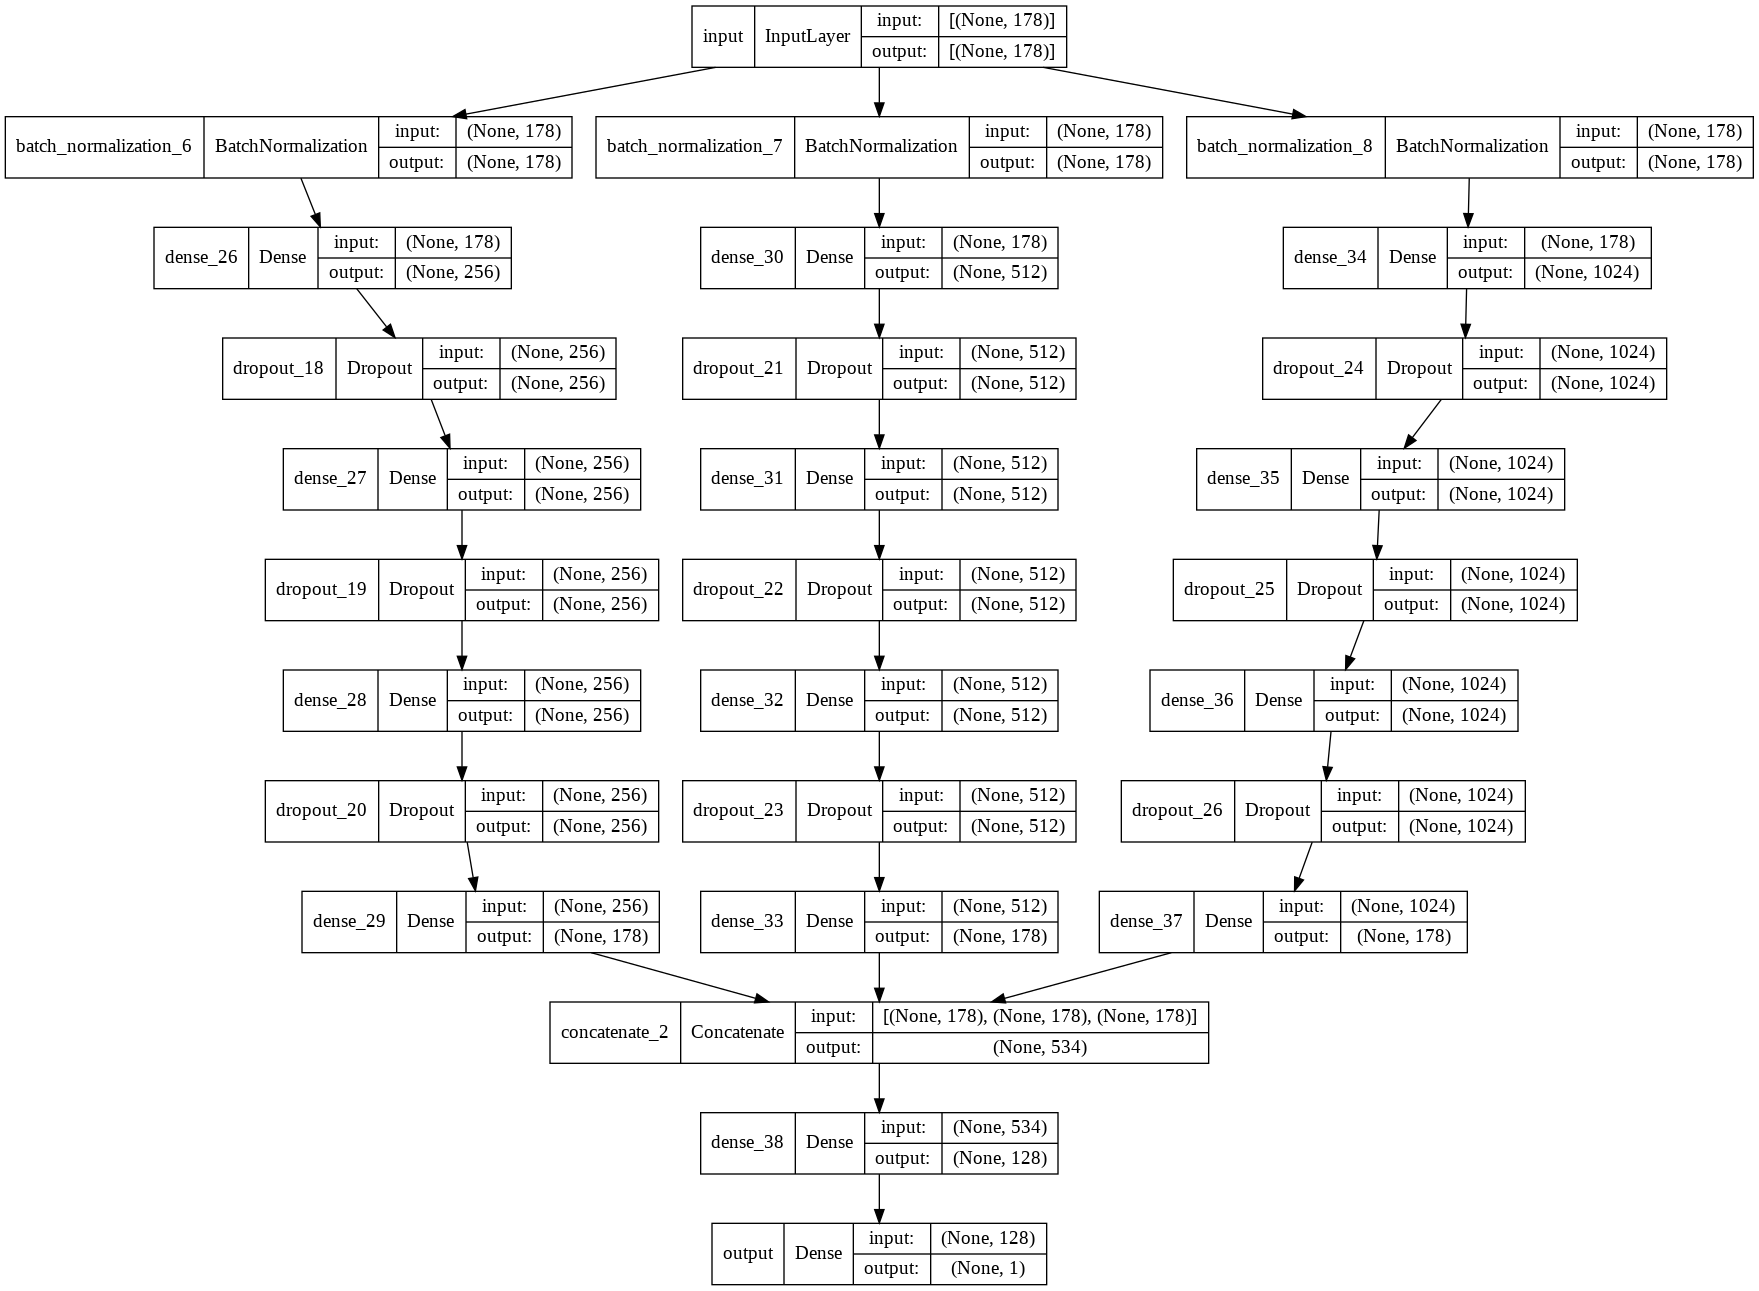

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=128,validation_split=0.2)

Epoch 1/100
54/54 [==============================] - 3s 23ms/step - loss: 0.6395 - accuracy: 0.7062 - val_loss: 0.4549 - val_accuracy: 0.9055
Epoch 2/100
54/54 [==============================] - 1s 17ms/step - loss: 0.4058 - accuracy: 0.9025 - val_loss: 0.2631 - val_accuracy: 0.9397
Epoch 3/100
54/54 [==============================] - 1s 17ms/step - loss: 0.2402 - accuracy: 0.9378 - val_loss: 0.1841 - val_accuracy: 0.9559
Epoch 4/100
54/54 [==============================] - 1s 17ms/step - loss: 0.1859 - accuracy: 0.9494 - val_loss: 0.1449 - val_accuracy: 0.9583
Epoch 5/100
54/54 [==============================] - 1s 17ms/step - loss: 0.1403 - accuracy: 0.9612 - val_loss: 0.1485 - val_accuracy: 0.9536
Epoch 6/100
54/54 [==============================] - 1s 17ms/step - loss: 0.1314 - accuracy: 0.9638 - val_loss: 0.1563 - val_accuracy: 0.9525
Epoch 7/100
54/54 [==============================] - 1s 16ms/step - loss: 0.1175 - accuracy: 0.9659 - val_loss: 0.1133 - val_accuracy: 0.9617
Epoch 

In [ ]:
model.evaluate(X_test,y_test)

90/90 [==============================] - 1s 6ms/step - loss: 0.1026 - accuracy: 0.9777


[0.1026146188378334, 0.977739155292511]

In [ ]:
from keras.utils import np_utils
import os

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
scores = model.evaluate(X_test, y_test, verbose=0, batch_size=200)
pred=model.predict(X_test, verbose=0, batch_size=200)
pred=np.round(pred)
print(classification_report(y_test, pred))
f1=precision_recall_fscore_support(y_test, pred, average='micro')
# from sklearn.metrics import confusion_matrix
# tn, fp, fn, tp=confusion_matrix(Y_test, pred).ravel()
# tns.append(tn)
# tps.append(tp)
# fns.append(fn)
# fps.append(fp)
# print(f1)
# F1scores.append(f1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# cvscores.append(scores[1] * 100)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2298
           1       0.99      0.90      0.94       577

    accuracy                           0.98      2875
   macro avg       0.98      0.95      0.96      2875
weighted avg       0.98      0.98      0.98      2875

accuracy: 97.77%
